<a href="https://colab.research.google.com/github/ajaythakur3369/PRODIGY_ML_03/blob/main/Task_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project - Task-03**
## **Developed By - Ajay Thakur (2016kuec2026@iiitkota.ac.in)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota (An Institute of National Importance under an Act of Parliament)**
## **Submitted To - Prodigy InfoTech**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/PRODIGY_ML_03/blob/main/Task_03.ipynb)**
## **Project Link (Drive) - [Click here](https://colab.research.google.com/drive/1lyWl-hLDipX9cJ4YHmT94CY-Dd8VzAug)**

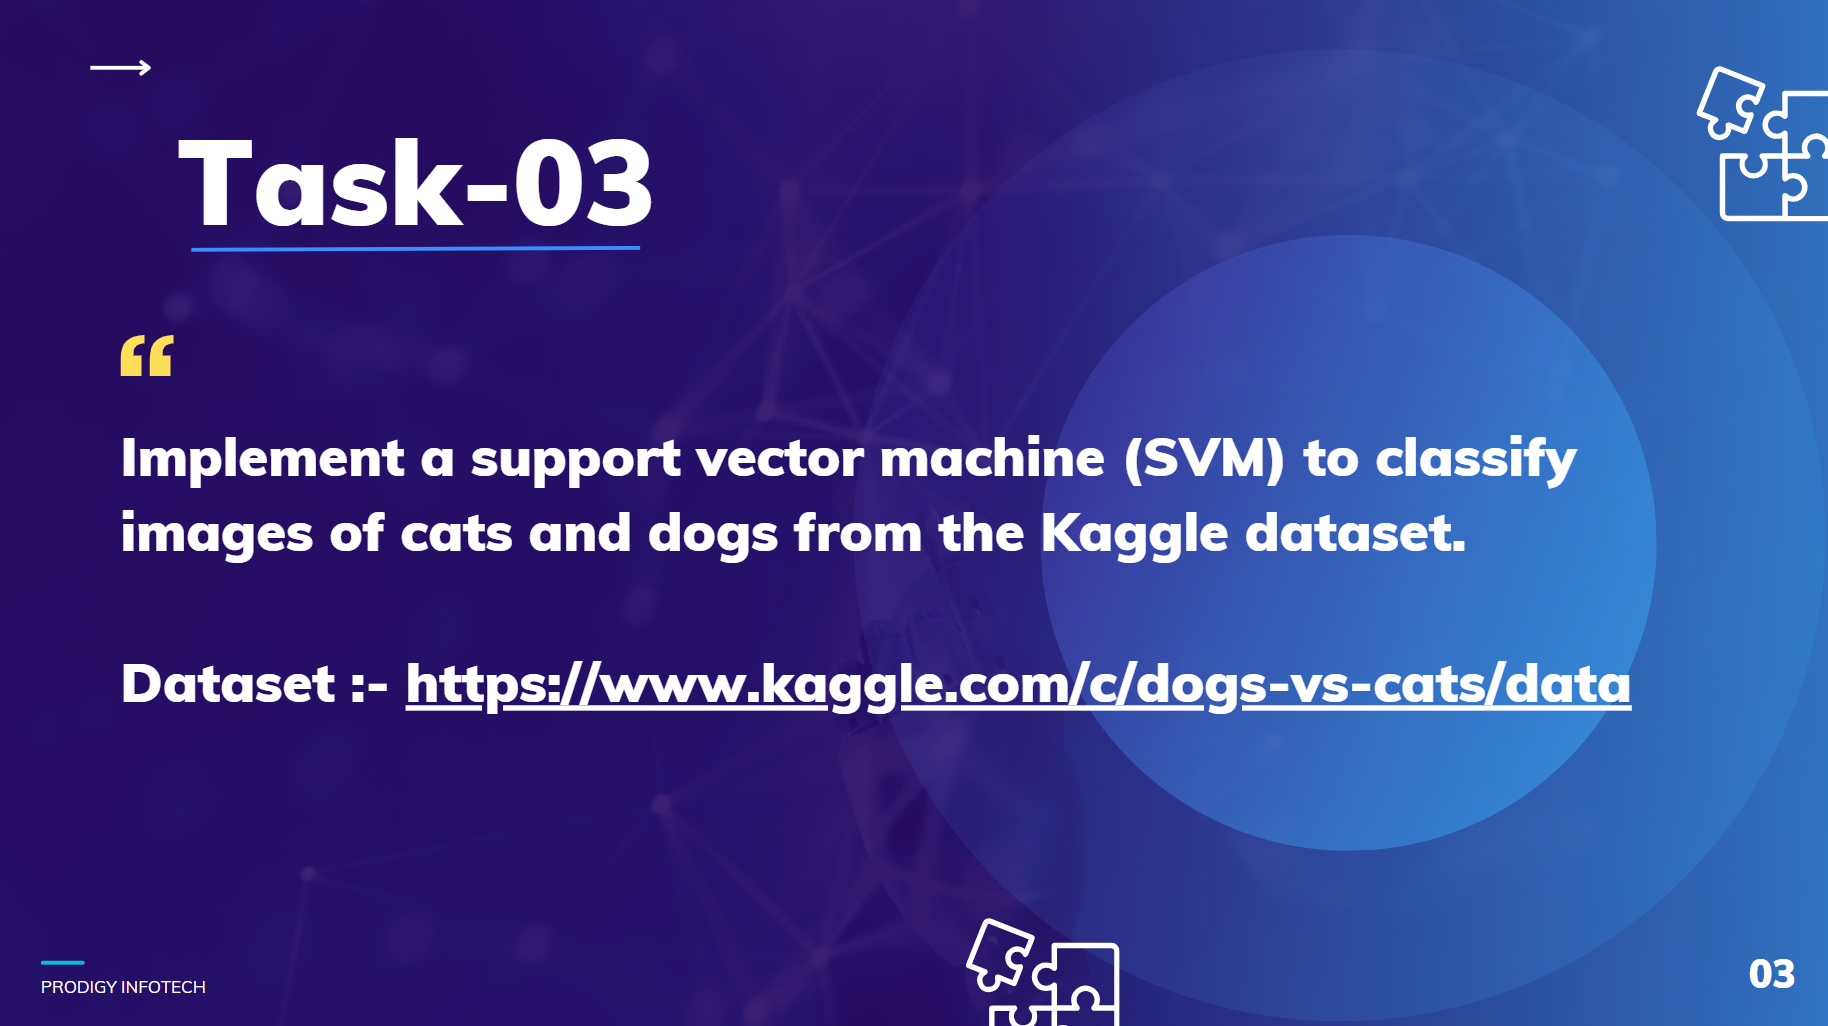



# **Problem Statement -**

Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset.


**Dataset -** https://www.kaggle.com/c/dogs-vs-cats/data

In [ ]:
# Import all the required libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, BatchNormalization, Dropout
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Access the Drive from Colab, for accessing the file
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Load the dataset
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Folders/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Folders/Task_3_Prodigy_Train_File',
    labels='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Folders/Task_3_Prodigy_Test_File',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 25040 files belonging to 1 classes.
Found 12500 files belonging to 1 classes.


In [ ]:
# Normalize
def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Dense(1, kernel_regularizer = tf.keras.regularizers.l2(0.01), activation
             ='linear'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs = 2, batch_size = 64, verbose = 1, validation_data = validation_ds)

Epoch 1/2
783/783 [==============================] - 6669s 8s/step - loss: 0.0122 - accuracy: 0.9990 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 2/2
783/783 [==============================] - 5051s 6s/step - loss: 8.1790e-04 - accuracy: 1.0000 - val_loss: 1.9448e-04 - val_accuracy: 1.0000


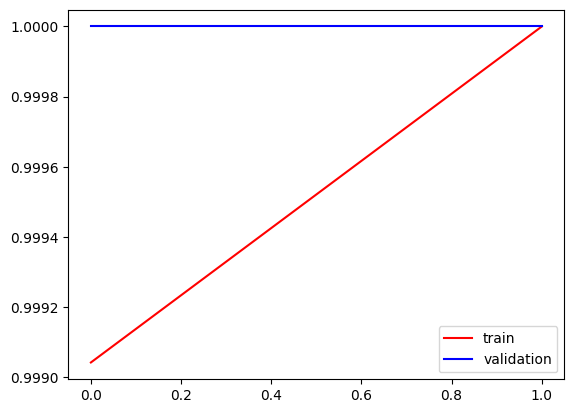

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

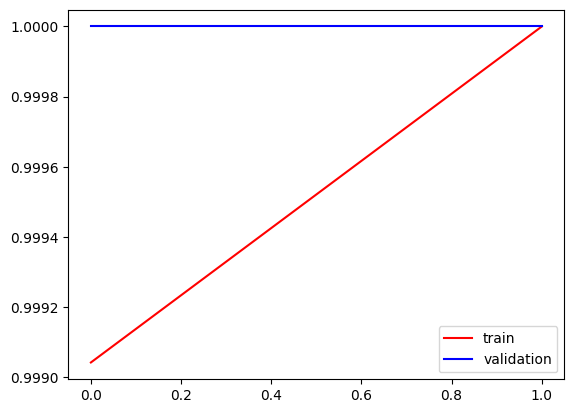

In [ ]:
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

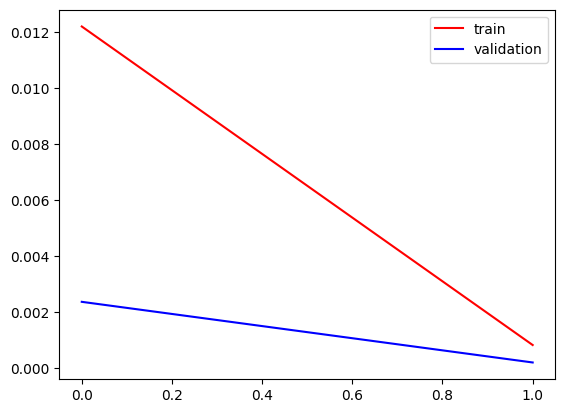

In [ ]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

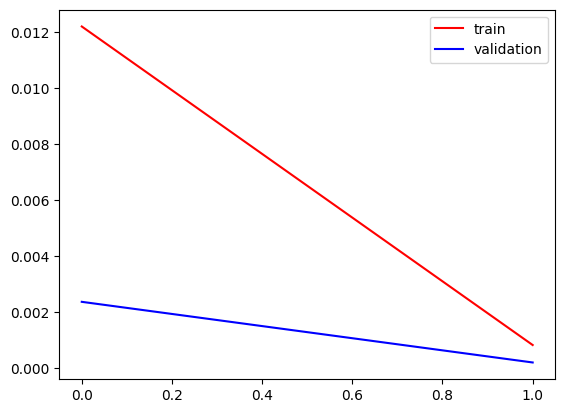

In [ ]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [ ]:
import cv2
from PIL import Image

In [ ]:
test_img = cv2.imread('/content/drive/MyDrive/Folders/Task_3_Prodigy_Train_File/train/cat.1.jpg')

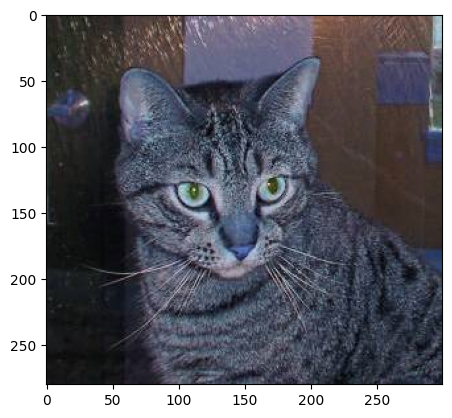

In [ ]:
plt.imshow(test_img)
plt.show()

In [ ]:
test_img.shape

(280, 300, 3)

In [ ]:
test_img = cv2.resize(test_img, (256, 256))

In [ ]:
test_input = test_img.reshape((1, 256, 256, 3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 288ms/step


array([[0.]], dtype=float32)

In [ ]:
test_img2 = cv2.imread('/content/drive/MyDrive/Folders/Task_3_Prodigy_Train_File/train/dog.1.jpg')

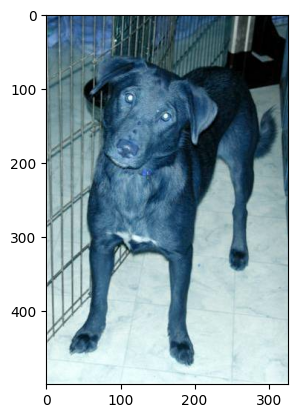

In [ ]:
plt.imshow(test_img2)
plt.show()

In [ ]:
test_img2.shape

(499, 327, 3)

In [ ]:
test_img2 = cv2.resize(test_img2, (256, 256))

In [ ]:
test_input2 = test_img2.reshape((1, 256, 256, 3))

In [ ]:
model.predict(test_input2)

1/1 [==============================] - 0s 69ms/step


array([[0.]], dtype=float32)